**4101553 Métodos Numéricos aplicados a la Ingenieria Civil**
-
Departamento de Ingeniería Civil

Universidad Nacional de Colombia

Sede Manizales

**Docente:** Juan Nicolás Ramírez Giraldo ([jnramirezg@unal.edu.co](mailto:jnramirezg@unal.edu.co))

"*Cum cogitaveris quot te antecedant, respice quot sequantur*" (**Séneca**)


[Repositorio de la asignatura](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/)

---

**Unidad 2: Interpolación**
-

**Contenido**
- 2.1. Interpolación polinómica
- 2.2. Interpolación con trazadores
- 2.3. Interpolación en varias dimensiones
- 2.4. Vecinos más cercanos - distancia inversa ponderada
- 2.5. Comandos en Python de interpolación

---

# **2.4. Vecinos más cercanos - distancia inversa ponderada**

- 2.4.1. Vecino más cercano unidimensional
- 2.4.2. Distancia inversa ponderada unidimensional
- 2.4.3. Vecino más cercano multidimensional
- 2.4.4. Distancia inversa ponderada multidimensional

---

Importación de librerías necesarias:

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

---

## **2.4.1. Vecino más cercano unidimensional**

Dado un conjunto de cinco puntos:

In [2]:
xp = [ 3.0,  4.0, 1.0,  5]
yp = [17.0, 13.0, 5.0, 12]

La cantidad de puntos se calcula como:

In [3]:
m = len(xp)

Se convierte a np.array() y se ordenan los puntos:

In [4]:
pto = np.array([np.array(xp), np.array(yp)]).T

In [5]:
pto[np.lexsort(np.fliplr(pto).T)]

array([[ 1.,  5.],
       [ 3., 17.],
       [ 4., 13.],
       [ 5., 12.]])

In [6]:
pto = pto[np.lexsort(np.fliplr(pto).T)]

In [7]:
xp = pto[:, 0]
yp = pto[:, 1]

Se calculan los puntos donde se cambia el valor de la interpolación:

In [8]:
(pto[1:, 0] + pto[:-1, 0])/2

array([2. , 3.5, 4.5])

In [9]:
dif = (xp[1:] + xp[:-1])/2

In [10]:
# Ensamblaje
xg = [pto[0, 0]]
yg = [pto[0, 1]]
for i in range(m-1):
    xg += [dif[i], dif[i]]
    yg += [pto[i,1], pto[i+1,1]]
xg += [pto[-1, 0]]
yg += [pto[-1, 1]]

In [11]:
xg

[1.0, 2.0, 2.0, 3.5, 3.5, 4.5, 4.5, 5.0]

In [12]:
yg

[5.0, 5.0, 17.0, 17.0, 13.0, 13.0, 12.0, 12.0]

---

Gráfica

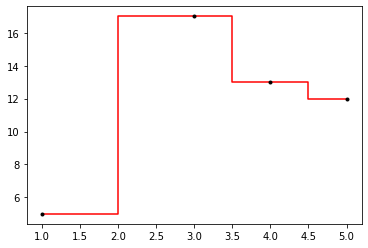

In [13]:
plt.plot(xg, yg, 'r')
plt.plot(xp, yp, 'k.')

Función que al ingresarle:
- x: un punto.
- xp: valores en x de un conjunto de puntos asociados a datos.
- yp: valores en y de un conjunto de puntos asociados a datos.

Retorna la interpolación por vecino más cercano.

In [14]:
def f(x, xp, yp):
    m = len(xp)
    pto = np.array([np.array(xp), np.array(yp)]).T
    pto = pto[np.lexsort(np.fliplr(pto).T)]
    xp = pto[:, 0]
    yp = pto[:, 1]
    
    dif = (xp[1:] + xp[:-1])/2
    # Ensamblaje
    xg = [pto[0, 0]]
    yg = [pto[0, 1]]
    for i in range(m-1):
        xg += [dif[i], dif[i]]
        yg += [pto[i,1], pto[i+1,1]]
    xg += [pto[-1, 0]]
    yg += [pto[-1, 1]]
    
    if x == xg[0]:
        y = yg[0]
    for i in range(m):
        if xg[2*i] < x <= xg[2*i+1]:
            y = yg[2*i]
    if x < xg[0] or x > xg[-1]:
        y = 0
    return y

Ver: [21-vecino_cercano_unidimensional.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/21-vecino_cercano_unidimensional.py)

---

Ejemplo 1:

In [15]:
xp = [-15, -12, -10, 0, 3, 3.5, 7, 8]
yp = [  1,   2,   3, 4, 5,   6, 7, 8]

In [16]:
xg = np.linspace(min(xp), max(xp),1000)
yg = []
for i in  range(len(xg)):
    yg += [f(xg[i], xp, yp)]

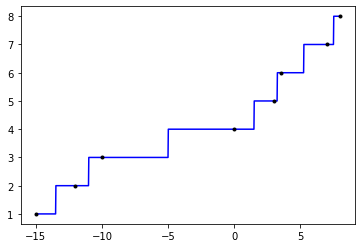

In [17]:
plt.plot(xg, yg, 'b')
plt.plot(xp, yp, 'k.')

---

Ejemplo 2:

In [18]:
xp = [-5, -4, -3, -2, -1, 0, 1, 2, 3,  4,  5]
yp = [25, 16,  9,  4,  1, 0, 1, 4, 9, 16, 25]

In [19]:
xg = np.linspace(min(xp), max(xp),1000)
yg = []
for i in  range(len(xg)):
    yg += [f(xg[i], xp, yp)]

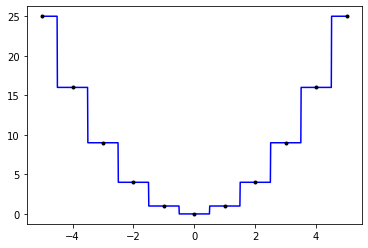

In [20]:
plt.plot(xg, yg, 'b')
plt.plot(xp, yp, 'k.')

In [21]:
xp = np.linspace(-4, 4, 100)

In [22]:
yp = xp**2

In [23]:
xp = list(xp)
yp = list(yp)

In [24]:
xg = np.linspace(min(xp), max(xp),1000)
yg = []
for i in  range(len(xg)):
    yg += [f(xg[i], xp, yp)]

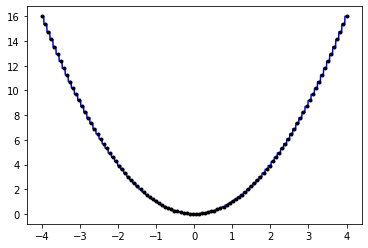

In [25]:
plt.plot(xg, yg, 'b')
plt.plot(xp, yp, 'k.')

---

# **2.4.2. Distancia inversa ponderada unidimensional**

Si se cuenta con un conjunto de puntos ($x_{p_i}$, $y_{p_i}$) es posible calcular la interpolación en un punto $x_g$ a través de:

$y_g = \displaystyle\frac{\displaystyle\sum^{n}_{i=1}{\frac{y_i}{d_i^p}}}{\displaystyle\sum{(1/d_i)^p}}$

---

Dado tres puntos:

In [26]:
xp = [ 3.0,  4.0, 1.0]
yp = [17.0, 13.0, 5.0]

Se convierten los datos de entrada a np.array():

In [27]:
xp = np.array(xp, dtype=float)
yp = np.array(yp, dtype=float)

Se define una resolución en la cual se quiere evaluar la interpolación:

In [28]:
res = 0.1

Se define el grado p del factor ponderador:

In [29]:
p = 2

Se crea un conjunto de puntos de acuerdo con la resolución requerida:

In [30]:
np.arange(min(xp), max(xp), res)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9])

Artificio para evitar errores de cálculo por división entre cero:

In [31]:
np.arange(min(xp), max(xp), res) * np.pi/(np.pi-0.001)

array([1.00031841, 1.10035025, 1.20038209, 1.30041393, 1.40044578,
       1.50047762, 1.60050946, 1.7005413 , 1.80057314, 1.90060498,
       2.00063682, 2.10066866, 2.2007005 , 2.30073235, 2.40076419,
       2.50079603, 2.60082787, 2.70085971, 2.80089155, 2.90092339,
       3.00095523, 3.10098707, 3.20101892, 3.30105076, 3.4010826 ,
       3.50111444, 3.60114628, 3.70117812, 3.80120996, 3.9012418 ])

In [32]:
xg = np.arange(min(xp), max(xp)+res, res) * np.pi/(np.pi-0.001)

---

Cantidad de puntos asociados a datos:

In [33]:
m = len(xp)

Cálculo de los pesos:

In [34]:
w = np.zeros(len(xg))  # Espacio de memoria para los pesos.

In [35]:
for i in range(m):
    dist = abs(xp[i] - xg)
    w += 1/(dist)**p

In [36]:
w

array([9.86332258e+06, 9.96992037e+01, 2.53411086e+01, 1.15639182e+01,
       6.77491525e+00, 4.59715783e+00, 3.45732703e+00, 2.81899769e+00,
       2.46209112e+00, 2.28715399e+00, 2.25016171e+00, 2.33905025e+00,
       2.56775667e+00, 2.98246222e+00, 3.68551308e+00, 4.90165657e+00,
       7.17698055e+00, 1.21132386e+01, 2.62282011e+01, 1.02977258e+02,
       1.09592594e+06, 9.95185246e+01, 2.65201126e+01, 1.32695046e+01,
       9.17758928e+00, 8.15997668e+00, 9.20096889e+00, 1.33699148e+01,
       2.69904831e+01, 1.03880620e+02, 6.16458747e+05])

Cálculo de los puntos y interpolados:

In [37]:
yg = np.zeros(len(xg))

In [38]:
for i in range(m):
    dist = abs(xp[i] - xg)
    yg += yp[i]/(dist**p*w )

---

Gráfica:

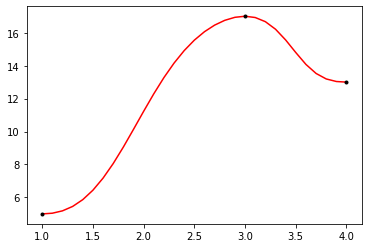

In [39]:
plt.plot(xg, yg, 'r')
plt.plot(xp, yp, 'k.')

---

Comparación con la interpolación polinomial:

In [40]:
yg2 = barycentric_interpolate(xp, yp, xg)

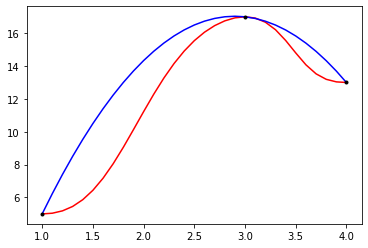

In [41]:
plt.plot(xg, yg, 'r')
plt.plot(xg, yg2, 'b')
plt.plot(xp, yp, 'k.')

---

Se organizan los resultados lógicos anteriores en una función:

Función que al ingresarle:
- xg: un conjunto de puntos de evaluación.
- xp: valores en x de un conjunto de puntos asociados a datos.
- yp: valores en y de un conjunto de puntos asociados a datos.
- res: resolución de evaluación.
- p: grado del factor ponderador inverso.

Retorna la interpolación mediante distancia inversa ponderada de los puntos asociados a datos en forma de np.array.

In [42]:
def interpolacion_idw_1d(xp, yp, res, p):
    # Se convierten los datos de entrada a np.array():
    xp = np.array(xp, dtype=float)
    yp = np.array(yp, dtype=float)
    
    xg = np.arange(min(xp), max(xp)+res, res) * np.pi/(np.pi-0.001)
    
    m = len(xp)  # Cantidad de puntos.
    
    # Cálculo de los pesos
    w = np.zeros(len(xg))  # Espacio de memoria para los pesos.
    for i in range(m):
        dist = abs(xp[i] - xg)
        w += 1/(dist)**p
    
    # Cálculo de los puntos y interpolados:
    yg = np.zeros(len(xg))
    for i in range(m):
        dist = abs(xp[i] - xg)
        yg += yp[i]/(dist**p*w )
    
    return xg, yg

Ver: [22-idw_unidimensional.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/22-idw_unidimensional.py)

---

Ejemplo 1:

In [43]:
xp = [4.5, 3.0, 7.0, 9.0]
yp = [1.0, 2.5, 2.5, 0.5]

In [44]:
xg, yg = interpolacion_idw_1d(xp, yp, 0.001, 2)
yg2 = barycentric_interpolate(xp, yp, xg)

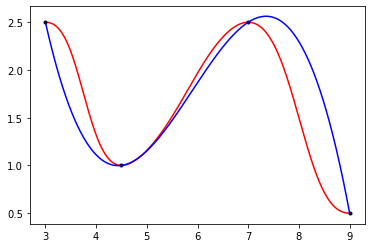

In [45]:
plt.plot(xg, yg, 'r')
plt.plot(xp, yp, 'k.')
plt.plot(xg, yg2, 'b')

---

Ejemplo 2:

In [46]:
xp = [-15, -12, -10, 0, 3, 3.5, 7, 8]
yp = [  1,   2,   3, 4, 5,   6, 7, 8]

In [47]:
xg, yg = interpolacion_idw_1d(xp, yp, 0.001, 2)
yg2 = barycentric_interpolate(xp, yp, xg)

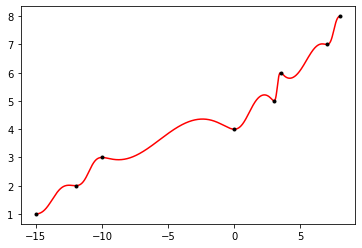

In [55]:
plt.plot(xg, yg, 'r')
plt.plot(xp, yp, 'k.')
#plt.plot(xg, yg2, 'b')

---

**Aplicación interactiva**

In [49]:
def grafica_idw_1d_ict(res, p):

    xp = [ 15, -12, -10, 0, 3, 3.5, 7, 8]
    yp = [  1,   2,   3, 4, 5,   6, 7, 8]
    
    # Se convierten los datos de entrada a np.array():
    xp = np.array(xp, dtype=float)
    yp = np.array(yp, dtype=float)
    
    xg = np.arange(min(xp), max(xp)+res, res) * np.pi/(np.pi-0.001)
    
    m = len(xp)  # Cantidad de puntos.
    
    # Cálculo de los pesos
    w = np.zeros(len(xg))  # Espacio de memoria para los pesos.
    for i in range(m):
        dist = abs(xp[i] - xg)
        w += 1/(dist)**p
    
    # Cálculo de los puntos y interpolados:
    yg = np.zeros(len(xg))
    for i in range(m):
        dist = abs(xp[i] - xg)
        yg += yp[i]/(dist**p*w )
    
    yg2 = barycentric_interpolate(xp, yp, xg)
    plt.plot(xg, yg, 'r')
    plt.plot(xp, yp, 'k.')
    plt.show()

In [50]:
from ipywidgets import interact 
interact(grafica_idw_1d_ict, res = (0.01, 1, 0.01),p = (0, 100, 0.5))
None

interactive(children=(FloatSlider(value=0.5, description='res', max=1.0, min=0.01, step=0.01), FloatSlider(val…

In [51]:
np.mean(yp)

4.5

---

## **2.4.3. Vecino más cercano multidimensional**

Ver:

- Ver: [23-vecino_cercano_varias_dim.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/23-vecino_cercano_varias_dim.py)
- Ver: [24-poligos_thiessen.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/24-poligos_thiessen.py)

---

## **2.4.4. Distancia inversa ponderada multidimensional**

$z_g = \displaystyle\frac{\displaystyle\sum^{n}_{i=1}{\frac{z_i}{d_i^p}}}{\displaystyle\sum{(1/d_i)^p}}$

Ver: 
- 25-distancia_inversa_ponderada.py

In [52]:
def grafica_idw_ict(res, p):
    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.image import NonUniformImage

    X=0
    Y=1

    estacion = np.array([[ 10,  30],
                         [ 30, 120],
                         [ 50,  10],
                         [120,  40],
                                   ])

    PPT = np.array([60, 100, 40, 120])

    x = np.arange(0, 140, res)*np.pi/(np.pi-0.001)
    y = np.arange(0, 140, res)

    n_cuad = len(x)

    x_map = np.ones((n_cuad, n_cuad))*x
    y_map = (np.ones((n_cuad, n_cuad))*y).T

    w  = np.zeros((n_cuad, n_cuad))
    for i in range(len(estacion)):
        dist = ((x_map-estacion[i][X])**2 +(y_map-estacion[i][Y])**2)**0.5
        w += 1/(dist)**p

    PPT_i  = np.zeros((n_cuad, n_cuad))
    for i in range(len(estacion)):
        dist = ((x_map-estacion[i][X])**2 +(y_map-estacion[i][Y])**2)**0.5
        PPT_i += PPT[i]/(dist**p*w)



    fig, ax = plt.subplots(figsize=(4.5, 4.5))
    im = NonUniformImage(ax, interpolation='nearest', extent=(0, 140, 0, 140),
                         cmap='viridis')
    im.set_data(x, y, PPT_i)
    ax.add_image(im)

    ax.set_xlim(0.5, 140)
    ax.set_ylim(0.5, 140)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title('IDW')

- Ver: [25-idw_varias_dim.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/25-idw_varias_dim.py)

In [53]:
from ipywidgets import interact 
interact(grafica_idw_ict, res = (0.1, 100, 1),p = (0, 100, 0.5))
None

interactive(children=(FloatSlider(value=49.1, description='res', min=0.1, step=1.0), FloatSlider(value=50.0, d…